## Customer Segmentation

The ultimate goal is to:

Identify 'Target Customers' (i.e., customer clusters that show high income and high spending score).

Understand the characteristics of each customer segment (e.g., "Young adults with low income but high spending").

Provide actionable insights to your marketing team so they can tailor promotions, product placements, and advertising campaigns to each specific group.

In [1]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for cleaner output in Jupyter
warnings.filterwarnings('ignore')

# Load the dataset 

df = pd.read_csv(r'C:\Users\Mustajab Hussain\Downloads\Mall_Customers.csv')

# Select the features for K-Means Clustering

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values 

# Display the first few rows of the data we will use
print("--- Data Snapshot for Clustering ---")
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']).head())
print("\nShape of the feature matrix (customers, features):", X.shape)

--- Data Snapshot for Clustering ---
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Shape of the feature matrix (customers, features): (200, 2)


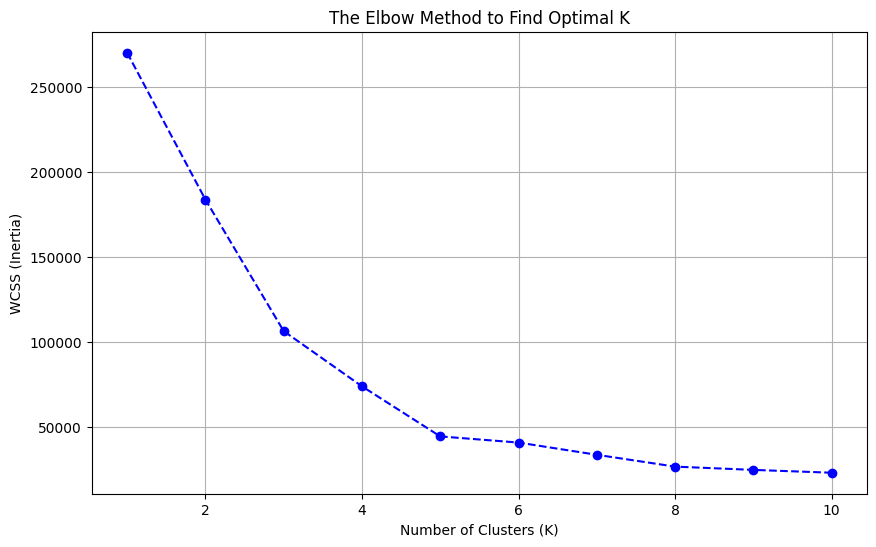

Interpret the plot: Look for the 'elbow' point where the WCSS decrease starts to slow down significantly. This is usually the optimal K.


In [2]:
# List to hold the WCSS (Inertia) values for each k
wcss = [] 

# We will test K values from 1 to 10
for i in range(1, 11):
    # Initialize KMeans
    # n_init='auto' ensures best practices are followed for initialization
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Append the WCSS (Inertia) to the list
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

print("Interpret the plot: Look for the 'elbow' point where the WCSS decrease starts to slow down significantly. This is usually the optimal K.")

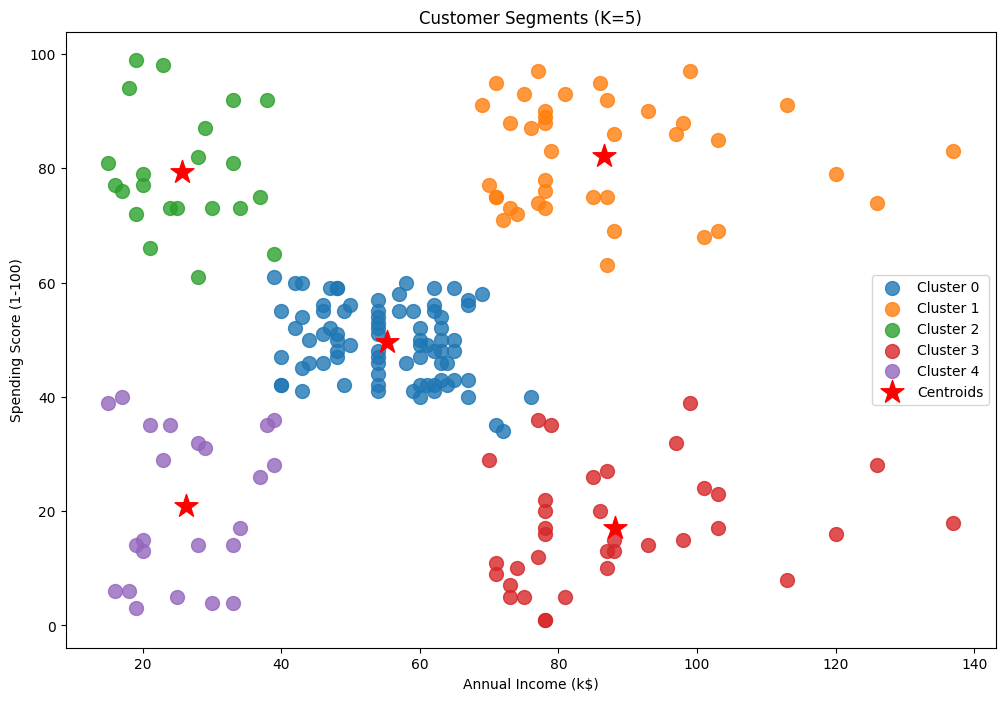


--- Cluster Summary Statistics (Mean Values) ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
0        42.716049           55.296296               49.518519
4        45.217391           26.304348               20.913043
3        41.114286           88.200000               17.114286


In [3]:
# 1. Choose the optimal K (assuming K=5 from the Elbow Plot)
optimal_k = 5

# 2. Train the final K-Means model with K=5
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init='auto', random_state=42)

# Get the cluster assignments (labels) for each customer
y_kmeans = final_kmeans.fit_predict(X)

# 3. Add the cluster labels back to the original DataFrame for analysis
df['Cluster'] = y_kmeans

# 4. Visualize the 5 Clusters
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
for i in range(optimal_k):
    plt.scatter(
        # Filter data points for the current cluster
        X[y_kmeans == i, 0], 
        X[y_kmeans == i, 1], 
        s=100, 
        label=f'Cluster {i}', 
        alpha=0.8
    )

# Plot the centroids (cluster centers)
plt.scatter(
    final_kmeans.cluster_centers_[:, 0], 
    final_kmeans.cluster_centers_[:, 1], 
    s=300, 
    c='red', 
    marker='*', 
    label='Centroids'
)

plt.title('Customer Segments (K=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(False)
plt.show()

# 5. Display the characteristics of the resulting clusters
print("\n--- Cluster Summary Statistics (Mean Values) ---")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().sort_values(by='Spending Score (1-100)', ascending=False))

In [4]:
# Analyze the count of each gender within each cluster
gender_counts = df.groupby('Cluster')['Gender'].value_counts().unstack(fill_value=0)

# Calculate the percentage of each gender within each cluster
gender_percentages = df.groupby('Cluster')['Gender'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

print("--- Gender Count per Cluster ---")
print(gender_counts)

print("\n--- Gender Percentage (%) per Cluster ---")
print(gender_percentages.round(1))

--- Gender Count per Cluster ---
Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            13     9
3            16    19
4            14     9

--- Gender Percentage (%) per Cluster ---
Gender   Female  Male
Cluster              
0          59.3  40.7
1          53.8  46.2
2          59.1  40.9
3          45.7  54.3
4          60.9  39.1


In [5]:
# Calculate the mean age for each cluster
age_means = df.groupby('Cluster')['Age'].mean().reset_index()

print("\n--- Mean Age per Cluster ---")
print(age_means.round(1))


--- Mean Age per Cluster ---
   Cluster   Age
0        0  42.7
1        1  32.7
2        2  25.3
3        3  41.1
4        4  45.2


<Figure size 1000x600 with 0 Axes>

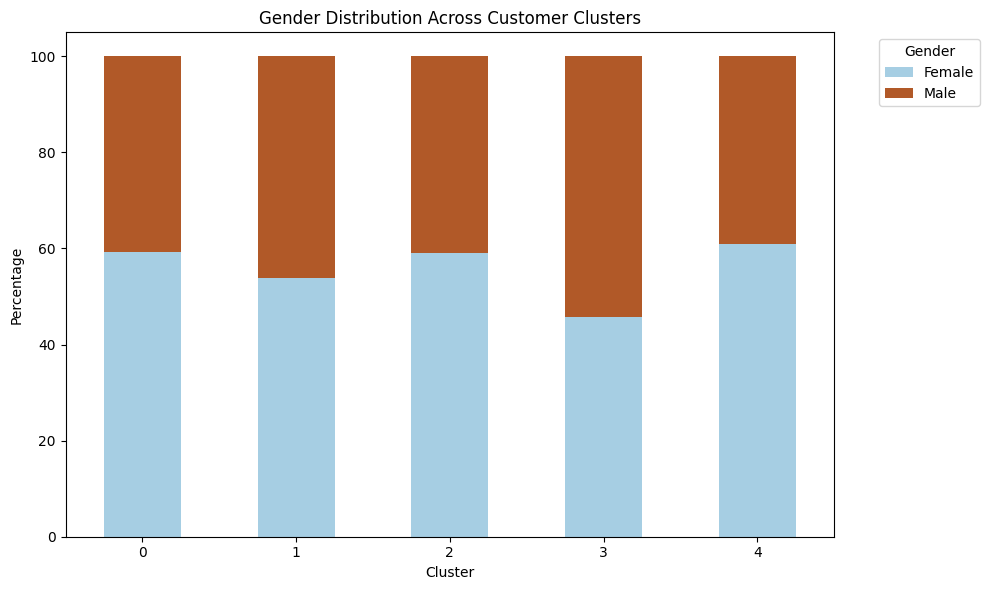

--- Interpretation ---
This chart visually confirms which clusters have a higher proportion of males or females, providing more nuanced insights for targeted marketing campaigns.


In [6]:
# Recalculate gender percentages to ensure it's up-to-date
gender_percentages = df.groupby('Cluster')['Gender'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

plt.figure(figsize=(10, 6))
gender_percentages.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))
plt.title('Gender Distribution Across Customer Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("--- Interpretation ---")
print("This chart visually confirms which clusters have a higher proportion of males or females, providing more nuanced insights for targeted marketing campaigns.")

In [11]:
print("\n" + "="*50)
print("             🚀 FINAL MARKETING STRATEGY 🚀")
print("="*50 + "\n")

print("Based on the 5 identified customer segments (clusters), here's a tailored marketing strategy for your mall:\n")

# Re-displaying key cluster characteristics for context
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
print("--- Cluster Summary (Mean Values for Age, Income, Spending Score) ---")
print(cluster_summary.sort_values(by='Spending Score (1-100)', ascending=False))

gender_perc = df.groupby('Cluster')['Gender'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(1)
print("\n--- Gender Percentage (%) per Cluster ---")
print(gender_perc)

print("\n" + "-"*60)
print(" STRATEGY FOR EACH CUSTOMER SEGMENT:")
print("-"*60 + "\n")

print("="*60)
print("By understanding these distinct segments, your marketing team can allocate resources more effectively and achieve higher ROI on their campaigns.")
print("="*60)


             🚀 FINAL MARKETING STRATEGY 🚀

Based on the 5 identified customer segments (clusters), here's a tailored marketing strategy for your mall:

--- Cluster Summary (Mean Values for Age, Income, Spending Score) ---
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
1        32.7                86.5                    82.1
2        25.3                25.7                    79.4
0        42.7                55.3                    49.5
4        45.2                26.3                    20.9
3        41.1                88.2                    17.1

--- Gender Percentage (%) per Cluster ---
Gender   Female  Male
Cluster              
0          59.3  40.7
1          53.8  46.2
2          59.1  40.9
3          45.7  54.3
4          60.9  39.1

------------------------------------------------------------
 STRATEGY FOR EACH CUSTOMER SEGMENT:
------------------------------------------------------------

By understand

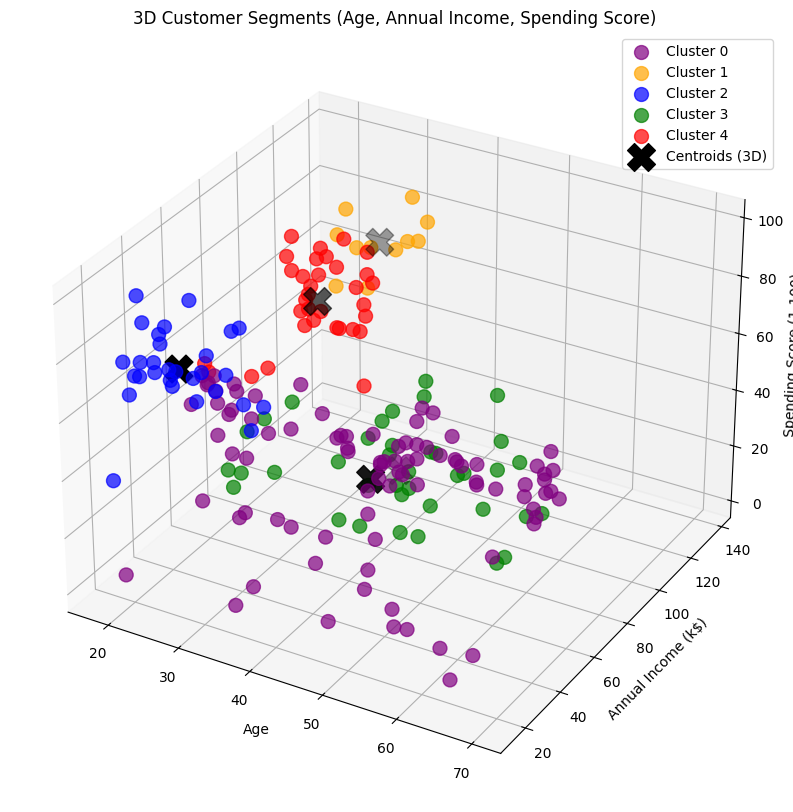


--- Interpretation ---
This 3D plot provides a richer perspective, showing how age interacts with income and spending for each segment.
For instance, you might observe a cluster of young, low-income, high-spending individuals (young spenders) vs. older, high-income, low-spending individuals (frugal elite).
Analyze the position of each cluster in 3D space to further refine your segment understanding.


In [9]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Prepare data for 3D visualization
# We'll use Age, Annual Income (k$), and Spending Score (1-100)
X_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Re-run K-Means on these 3 features (or use the existing labels if you prefer
# to see how the 2D clusters look in 3D without re-clustering)
# For consistency, let's re-cluster with 3 features and optimal_k=5
kmeans_3d = KMeans(n_clusters=optimal_k, init='k-means++', n_init='auto', random_state=42)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d)

# Add 3D cluster labels to a temporary DataFrame for easy access
df_3d_viz = df.copy()
df_3d_viz['Cluster_3D'] = y_kmeans_3d

# Create the 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the clusters
colors = ['purple', 'orange', 'blue', 'green', 'red'] # You can customize these

for i in range(optimal_k):
    ax.scatter(
        df_3d_viz[df_3d_viz['Cluster_3D'] == i]['Age'], 
        df_3d_viz[df_3d_viz['Cluster_3D'] == i]['Annual Income (k$)'], 
        df_3d_viz[df_3d_viz['Cluster_3D'] == i]['Spending Score (1-100)'], 
        s=100, 
        color=colors[i], 
        label=f'Cluster {i}', 
        alpha=0.7
    )

# Plot the centroids
ax.scatter(
    kmeans_3d.cluster_centers_[:, 0], 
    kmeans_3d.cluster_centers_[:, 1], 
    kmeans_3d.cluster_centers_[:, 2], 
    s=400, 
    marker='X', 
    c='black', 
    label='Centroids (3D)'
)


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Customer Segments (Age, Annual Income, Spending Score)')
ax.legend()
plt.show()

print("\n--- Interpretation ---")
print("This 3D plot provides a richer perspective, showing how age interacts with income and spending for each segment.")
print("For instance, you might observe a cluster of young, low-income, high-spending individuals (young spenders) vs. older, high-income, low-spending individuals (frugal elite).")
print("Analyze the position of each cluster in 3D space to further refine your segment understanding.")